In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import sklearn.preprocessing as skpre
from sklearn.linear_model import LogisticRegression as LR
import scipy
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import numpy 
from sklearn.model_selection import train_test_split as ttt



In [2]:
testPath = "Data/test.csv"
trainPath = "Data/train.csv"
genderSubmissionPath = "Data/gender_submission.csv"


In [3]:
testPD = pd.read_csv(testPath)
trainPD = pd.read_csv(trainPath)
genderSubPD = pd.read_csv(genderSubmissionPath)


In [ ]:
# get the info about the data 
# print(trainPD.max())
# print(trainPD.min())
# trainPD['PassengerId'].plot.density()
# plot.hist(trainPD['Age'])
# plot.hist(trainPD['Fare'])
# plot.hist(trainPD['Sex'])

In [4]:
# performing pca
# get the features
features = []
for  cols in trainPD.columns:
    # features[index]= cols
    if cols != "Survived":
        features.append(cols)
# first step: separate from data and output
X =  trainPD.loc[:,features]
Y = trainPD.loc[:,['Survived']]

# no performing pca as first we should know if pca can be used with discrete and continuous variables at the same time


In [ ]:
# data that can be standardize
# leave this like thi
featureStand = ['Age','SibSp','Parch','Fare']
xCont = X.loc[:,featureStand]
print(xCont.head(3))

# standardize that data
print(X.loc[:,xCont])
# xStand = skpre.StandardScaler.fit_transform(X.loc[:,xCont])
# print(xStand.head(3))


<AxesSubplot:xlabel='SibSp'>

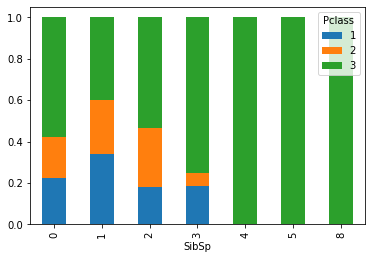

In [66]:
# compare values for different outputs
# check how many were dead and alive

trainPD['Survived'].value_counts()
# dead 549 alive 342
# getting an insight on the data
trainPD.groupby('Survived').mean()
# MEAN ANALYSIS
# the people that survived had a higher fare (48$) versus those who died (22$)
# the same thing can be taken from the pclass variable, as a mean  for those who survived had 1.95 and those 
# who died had a 2.5 . This implies (for now) that the lower income class had more probability to die
# concerning the age, it's somehow similar 30(1) versus 28 (0)
# SibSp, suggests that the lower income class had more family members
# Parch suggests that more children survived as it's lower to the ones who survivied, which means those didn't have husband or wife

trainPD.groupby('Pclass').mean() # interesting to check the differences bteween classes
# difference in the ones who urvived and the different classes 
pd.crosstab(trainPD.Pclass,trainPD.Survived).plot(kind='bar')

# different in family members between classes
table = pd.crosstab(trainPD.SibSp,trainPD.Pclass)
table.div(table.sum(1).astype(float), axis= 0 ).plot(kind = 'bar',stacked =True)


In [8]:
logreg = LR()
# rfe = RFE(logreg)


# change some variables that a are readable
# if male then sex = 1 , else = 0
# we remove the variable of the name, cabin, ticket 
# we change the embarque cabin from letters to numbers (for now we discard the data)
newX = trainPD.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
newX['Sex'].replace({'female':'0','male':'1'},inplace=True)
# rfe = rfe.fit(newX,Y)

In [ ]:
# we check for the variables type
# print(newX.dtypes)
# the one form the sex is an object, we have to cast it
newX['Sex'] = pd.to_numeric(newX['Sex'])

# logit_model =sm.Logit(Y,newX)
# result = logit_model.fit()
# print(result.summary2())
# check where are the nan or null values by column
print(newX['Fare'].isnull().values.any())
# nan values in  Age
print(newX.isnull().sum()) # we proceed by deleting the values and see how it goes becausae there are 
# we remove the values of nan only in the age
trainPD.dropna(subset=['Age'],inplace=True) 

In [11]:
# once the data is cleaned we perform the same steps as before to get the data ready
cleanX = trainPD.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
cleanX['Sex'].replace({'female':'0','male':'1'},inplace=True) # the 0 turns into a singular matrix
cleanY = trainPD.loc[:,['Survived']]
cleanX['Sex'] = pd.to_numeric(cleanX['Sex'])

In [ ]:
# we get to test the model
logit_model =sm.Logit(cleanY,cleanX)
result = logit_model.fit()
print(result.summary2())
# turns out the p values are 0 so we keep every variable, just the sibsp has a 0.01 , still is small enough to keep it


In [ ]:
x_Train,x_Test,y_Train,y_Test = ttt(cleanX,cleanY,test_size=0.3,random_state= 0)
logreg =LR()
logreg.fit(x_Train,y_Train)
y_pred =logreg.predict(x_Test)
# print('accuracy: {:.2f}'.format(logreg.score(x_Test,y_Test)))
# print(numpy.array(y_pred == y_Test[:]).sum())
# print(numpy.array(y_Test).reshape(y_Test.size)) # change dimensions
# print(numpy.array(y_pred))

accuracy = numpy.array(y_Test).reshape(y_Test.size) == numpy.array(y_pred)
print(accuracy)

In [ ]:
# check how the model wprls with the real data
# clean input test set
testPD = pd.read_csv(testPath)

# merge the data with the passenger id
wholeXTest = pd.merge(genderSubPD,testPD,on = 'PassengerId')


In [27]:
# clean data 

wholeXTest.dropna(subset=['Age'],inplace=True) 
wholeXTest.dropna(subset=['Fare'],inplace=True) 

cleanXTest = wholeXTest.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
cleanXTest['Sex'].replace({'female':'0','male':'1'},inplace=True) # the 0 turns into a singular matrix
cleanYTest = wholeXTest.loc[:,['Survived']]
cleanXTest['Sex'] = pd.to_numeric(cleanXTest['Sex'])




In [ ]:
# try the model
y_pred2 =logreg.predict(cleanXTest)
# print(y_pred2.shape)
# print(numpy.array(cleanYTest).reshape(cleanYTest.size).shape)
y_exp_reshaped = numpy.array(cleanYTest).reshape(cleanYTest.size)
accuracy = numpy.array(y_exp_reshaped == numpy.array(y_pred2))
print(accuracy)
# print(y_pred2)
# print(cleanYTest)
